In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
test_data = pd.read_csv('../data/spaceship-titanic/test.csv')
train_data = pd.read_csv('../data/spaceship-titanic/train.csv')
evaluate = pd.read_csv('../data/spaceship-titanic/sample_submission.csv')

In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [37]:
# clean data
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['HomePlanet'].fillna(train_data['HomePlanet'].mode()[0], inplace=True)
train_data['CryoSleep'].fillna(train_data['CryoSleep'].mode()[0], inplace=True)
train_data['Destination'].fillna(train_data['Destination'].mode()[0], inplace=True)
train_data['RoomService'].fillna(train_data['RoomService'].median(), inplace=True)
train_data['FoodCourt'].fillna(train_data['FoodCourt'].median(), inplace=True)
train_data['ShoppingMall'].fillna(train_data['ShoppingMall'].median(), inplace=True)
train_data['Spa'].fillna(train_data['Spa'].median(), inplace=True)
train_data['VRDeck'].fillna(train_data['VRDeck'].median(), inplace=True)

test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['HomePlanet'].fillna(test_data['HomePlanet'].mode()[0], inplace=True)
test_data['CryoSleep'].fillna(test_data['CryoSleep'].mode()[0], inplace=True)
test_data['Destination'].fillna(test_data['Destination'].mode()[0], inplace=True)
test_data['RoomService'].fillna(test_data['RoomService'].median(), inplace=True)
test_data['FoodCourt'].fillna(test_data['FoodCourt'].median(), inplace=True)
test_data['ShoppingMall'].fillna(test_data['ShoppingMall'].median(), inplace=True)
test_data['Spa'].fillna(test_data['Spa'].median(), inplace=True)
test_data['VRDeck'].fillna(test_data['VRDeck'].median(), inplace=True)

In [38]:
train_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [39]:
features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age',
            'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

X_train = pd.get_dummies(train_data[features]).values
y_train = train_data['Transported'].values

X_test = pd.get_dummies(test_data[features]).values
y_test = evaluate['Transported'].values

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
y_pred = knn.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': y_pred})
output.to_csv('submissions/spaceship/submissionKNN.csv', index=False)   
print("Your submission was successfully saved!")


print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Your submission was successfully saved!
Train set Accuracy:  0.8083515472219027
Test set Accuracy:  0.6333878887070377


In [42]:
from sklearn import metrics
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.49029694, 0.63338789, 0.50783259, 0.59060089, 0.50245499,
       0.56558335, 0.49076455, 0.53144728, 0.49450549, 0.51671733,
       0.48772504, 0.51367781, 0.48000935, 0.5001169 , 0.46995558,
       0.48678981, 0.45779752, 0.47813888, 0.46364274])

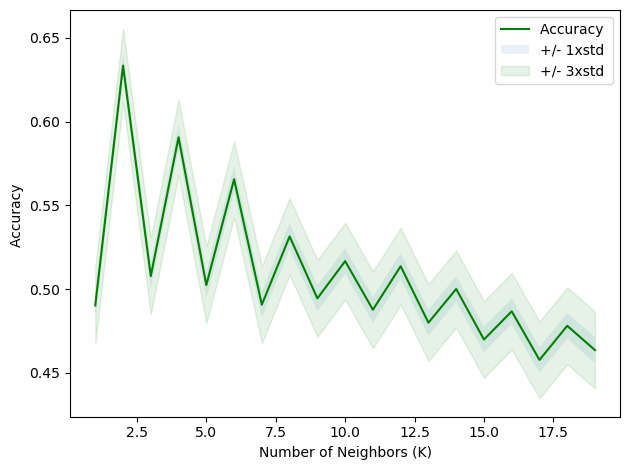

In [43]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [44]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6333878887070377 with k= 2


## D Tree

In [73]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': y_pred})
output.to_csv('submissions/spaceship/submissionRFC.csv', index=False)   
print("Your submission was successfully saved!")

print("Train set Accuracy: ", metrics.accuracy_score(y_train, rfc.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred_rfc))

Your submission was successfully saved!
Train set Accuracy:  0.9293684573795008
Test set Accuracy:  0.48328267477203646


In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
   'n_estimators': [100, 200, 300],
   'max_depth': [None, 10, 20, 30],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4],
   'max_features': ['sqrt', 'log2']  # Valid options
}


grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=

In [66]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, best_rf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, best_rf.predict(X_test)))

Train set Accuracy:  0.8295180029909123
Test set Accuracy:  0.47696983867196635


In [65]:
# save output to submission file
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': y_pred})
output.to_csv('submissions/spaceship/submissionRFCGridSearch.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [70]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': y_pred_gnb})
output.to_csv('submissions/spaceship/submissionGNB.csv', index=False)   
print("Your submission was successfully saved!")

print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred_gnb))

Your submission was successfully saved!
Train set Accuracy:  0.8083515472219027
Test set Accuracy:  0.2945990180032733


In [80]:
from sklearn import tree
dct = tree.DecisionTreeClassifier(max_leaf_nodes=19, random_state=0)
dct.fit(X_train, y_train)
y_pred_dct = dct.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': y_pred_dct})
output.to_csv('submissions/spaceship/submissionDCT.csv', index=False)
print("Your submission was successfully saved!")

# get accuracy
print("Train set Accuracy: ", metrics.accuracy_score(y_train, dct.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred_dct))

Your submission was successfully saved!
Train set Accuracy:  0.7909812492810308
Test set Accuracy:  0.4318447509936872


In [79]:
param_grid = {'max_leaf_nodes': np.arange(2, 20)}
grid_search = GridSearchCV(dct, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best value for max_leaf_nodes
best_max_leaf_nodes = grid_search.best_params_['max_leaf_nodes']

print("Best max_leaf_nodes:", best_max_leaf_nodes)

Best max_leaf_nodes: 19
